# Part 2. SQL Review (Select statements)

## Overview

Please watch the following videos
<ul>
<li> Introduction to Relational Databases (about 12 minutes): https://youtu.be/4h3buIkePnw . <br>
Consider - what is a database and what makes it "relational"?</li>
<li>Overview of the exemplar sndb.db (about 9 minutes): https://youtu.be/J3S5fLfyJ88 </li>
</ul>

Try it!

If you are **in the terminal window, with sqlite running the sndb** database as above.


*Format output*

Let's set things up to display the query results in a nice format.

Use the **.header on** command to tell the system to display column names

Use the **.mode columns** command to format the results in columns

<img src="media/formatoutput.jpg">



In [10]:
import pandas as pd
import os
import sqlite3
from IPython.display import YouTubeVideo

In [11]:
conn=sqlite3.connect('sndb.sqlite')

### SQL Select statement (reading data)

<u>Overview</u>  https://youtu.be/jWGA0CD_NMc

Practice. Try running these queries in the sndb.db file.

*Simple queries*
```SQL
    Select * from demog;

    Select ptname, pt_id from demog;
```    

In [12]:
pd.read_sql("""Select * from demog""", conn).head(10)

,PT_ID,PTNAME,ZIP,GENDER,RACE
0,1,"Nakamori, Akina",90911,F,J
1,10,"Brown, Mike",84102,M,B
2,100,"Hall, Arsenio",23315,M,B
3,1000,Sam Smith,84047,F,W
4,1001,"Wade, Gerry",84012,F,W
5,101,"Priest, Maxi",10915,M,B
6,1010,"nancy, nurse",84106,f,w
7,1011,"doug, dad",84109,m,w
8,1012,"billie, mom",84109,f,w
9,102,"Costner, Kevin",10915,M,W


In [13]:
pd.read_sql("""Select ptname, pt_id from demog""", conn).head(10)

,PTNAME,PT_ID
0,"Nakamori, Akina",1
1,"Brown, Mike",10
2,"Hall, Arsenio",100
3,Sam Smith,1000
4,"Wade, Gerry",1001
5,"Priest, Maxi",101
6,"nancy, nurse",1010
7,"doug, dad",1011
8,"billie, mom",1012
9,"Costner, Kevin",102


## Concatenation, limits

Concatenation combines columns, or lets you add text to the data in the column. The "limit" clause restricts how many rows show up in our results. 

Still in the terminal window with sqlite running the sndb.db - try this query
```SQL
    select ptname || ' zip: '||zip  as thepatient from demog limit 3;
```

In [14]:
pd.read_sql("""select ptname || ' zip: '||zip  as thepatient from demog limit 3""", 
            conn)

,thepatient
0,"Nakamori, Akina zip: 90911"
1,"Brown, Mike zip: 84102"
2,"Hall, Arsenio zip: 23315"


## Distinct
```SQL
    Select gender from demog; 
```

In [15]:
pd.read_sql("""Select gender from demog;""", conn).head(20)

,GENDER
0,F
1,M
2,M
3,F
4,F
5,M
6,f
7,m
8,f
9,M


```SQL
Select distinct gender from demog;
```

In [16]:
pd.read_sql("""Select distinct gender from demog;""", conn)

,GENDER
0,F
1,M
2,f
3,m
4,None


In [17]:
set(pd.read_sql("""Select distinct gender from demog;""", conn)["GENDER"])

{'f', 'F', None, 'M', 'm'}

## WHERE clause

[*Overview* (4 minutes): ](https://youtu.be/kjRms4_iyvk)

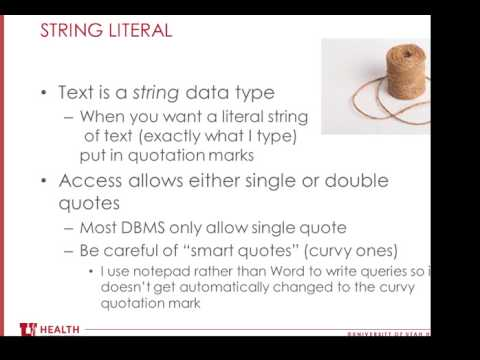

In [18]:
YouTubeVideo("kjRms4_iyvk")

### Practice
      
```SQL
    Select pt_id, ptname from demog where ptname = 'Hall, Arsenio';
```

**Note:** `"'Hall, Arsenio'"`

In [20]:
pd.read_sql("""Select pt_id, 
                      ptname 
               from demog 
               where ptname = 'Hall, Arsenio';""",
           conn)

,PT_ID,PTNAME
0,100,"Hall, Arsenio"


```SQL
Select * from demog where gender is null;
```

In [22]:
pd.read_sql("""Select count(*) from demog where gender is null""", conn)

,count(*)
0,266


In [23]:
pd.read_sql("""Select count(*) from demog where gender is ''""", conn).head(20)

,count(*)
0,0


## [Table Joins (11 min):]( https://youtu.be/XcEeR5mD-b4)

This video shows the ANSI standard version of SQL for table joins, which does the join in the WHERE clause. You may have previously learned table joins in the FROM clause - that is also allowable by most DBMS. You can put the SQL on a single line or multiple lines in the terminal window

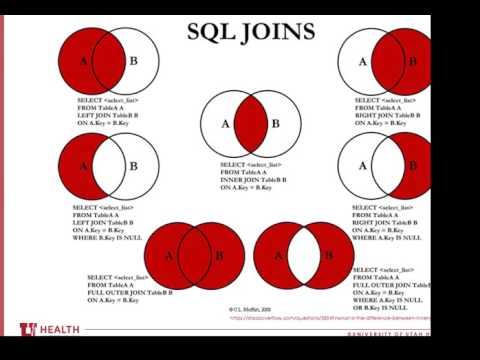

In [24]:
YouTubeVideo("XcEeR5mD-b4")

### Practice
```SQL
SELECT d.pt_id, ptname, temper
FROM demog d, vitals v
WHERE d.pt_id = v.pt_id;
```

In [25]:
pd.read_sql("""SELECT d.pt_id, ptname, temper
FROM demog d, vitals v
WHERE d.pt_id = v.pt_id;""", conn)

,PT_ID,PTNAME,TEMPER
0,1,"Nakamori, Akina",36.4
1,1,"Nakamori, Akina",36.7
2,1,"Nakamori, Akina",36.8
3,1,"Nakamori, Akina",36.7
4,1,"Nakamori, Akina",37.4
5,10,"Brown, Mike",36.6
6,10,"Brown, Mike",36.3
7,10,"Brown, Mike",36.7
8,10,"Brown, Mike",35.6
9,100,"Hall, Arsenio",36.7


### Multiple tables are joined in pairs
```SQL
    SELECT d.pt_id, ptname, ad.diagnosis as admit, dc.diagnosis as discharge
    FROM demog d, adm_dx ad, dsc_dx dc
    WHERE d.pt_id = ad.pt_id
    AND d.pt_id = dc.pt_id;
```

In [26]:
pd.read_sql("""SELECT d.pt_id, 
                      ptname, 
                      ad.diagnosis as admit, 
                      dc.diagnosis as discharge
               FROM demog d, 
                    adm_dx ad, 
                    dsc_dx dc
               WHERE d.pt_id = ad.pt_id AND d.pt_id = dc.pt_id;""",
            conn)

,PT_ID,PTNAME,admit,discharge
0,156,"DeNiro, Robert","ACUTE, BUT ILL-DEFINED, CEREBROVASCULAR DISEASE","CEREBRAL ARTERY OCCLUSION, UNSPECIFIED"
1,157,"Pan, Peter","RENAL FAILURE, UNSPECIFIED",INSULIN DEPENDENT DIABETES MELLITUS
2,158,"Piper, Peter",INFECTION AND INFLAMMATORY REACTION,INFECTION AND INFLAMMATORY REACTION
3,159,"Warner, Rick","ABDOMINAL OR PELVIC SWELLING, MASS, OR LUMP","MALIGNANT NEOPLASM OF UPPER LOBE, BRONCHUS OR ..."
4,160,"Steiner, Jerry","T7-T12 LEVEL SPINAL CORD INJURY, UNSPECIFIED",CLOSED FRACTURE OF T7-T12 LEVEL WITH OTHER SPE...
5,161,"Saito, Yuki","ASTHMA, UNSPECIFIED TYPE","ASTHMA, UNSPECIFIED TYPE,"
6,162,"Lau, Andy",INTERMEDIATE CORONARY SYNDROME (UNSTABLE ANGINA),INTERMEDIATE CORONARY SYNDROME (UNSTABLE ANGINA)
7,163,"Hopkins, John",BRONCHIECTASIS,BRONCHIECTASIS
8,164,"Simpson, Homer",CHRONIC RENAL FAILURE,INSULIN DEPENDENT DIABETES MELLITUS
9,165,"Simpson, Bart",UNSPECIFIED SEPTICEMIA,PATHOLOGICAL FRACTURE


## [Conditions, predicate logic* (8 min):]( https://youtu.be/VoUFc-Yjgb0)

### Practice
```SQL
    SELECT d.pt_id, ptname, HR
    FROM demog d, vitals v
    WHERE 
        d.pt_id = v.pt_id AND HR > 80;
```

In [27]:
pd.read_sql("""
    SELECT d.pt_id, ptname, HR
    FROM demog d, vitals v
    WHERE 
        d.pt_id = v.pt_id AND HR > 80""", conn)

,PT_ID,PTNAME,HR
0,1,"Nakamori, Akina",96
1,10,"Brown, Mike",96
2,10,"Brown, Mike",100
3,100,"Hall, Arsenio",88
4,100,"Hall, Arsenio",92
5,100,"Hall, Arsenio",98
6,100,"Hall, Arsenio",82
7,100,"Hall, Arsenio",104
8,104,"Mason, Perry",88
9,106,"Wong, Henry",88


```SQL
Select ptname from demog
    where zip IN ('20015', '21060', '23315');
```

**Note:** "'" vs "`"

In [28]:
pd.read_sql("""Select ptname from demog
    where zip IN ('20015', '21060', '23315');""", conn)

,PTNAME
0,"Hall, Arsenio"
1,"Hopkins, John"
2,"Sinatra, Frank"
3,"Bunny, Bugs"
4,"Duck, Daffy"
5,"Duck, Donald"
6,"Rutherford, Mike"
7,"Joel, Billy"
8,"Crystal, Billy"
9,"Houston, Whitney"


```SQL
Select * from demog where ptname like 'Cr_stal%';
```

In [29]:
pd.read_sql("""Select * from demog where ptname like 'Cr_stal%';""", conn)

,PT_ID,PTNAME,ZIP,GENDER,RACE
0,97,"Crystal, Billy",23315,M,W


## Functions

### [Sorting and grouping, functions (9 min):]( https://youtu.be/Ld2Uy4zF9Tg)

#### Practice
```SQL
    Select pt_id, temper from vitals
    order by pt_id, temper desc
    limit 20;
```

In [30]:
pd.read_sql("""Select pt_id, temper from vitals
    order by pt_id, temper desc
    limit 20;""", conn).head(20)

,PT_ID,TEMPER
0,1,37.4
1,1,36.8
2,1,36.7
3,1,36.7
4,1,36.4
5,10,36.7
6,10,36.6
7,10,36.3
8,10,35.6
9,100,37.6


```SQL
select 
    pt_id, 
    temper 
from vitals
order by cast(pt_id as integer), temper desc
limit 20;
```

In [31]:
pd.read_sql("""select 
    pt_id, 
    temper 
from vitals
order by cast(pt_id as integer), temper desc
limit 20;""", conn).head(20)

,PT_ID,TEMPER
0,1,37.4
1,1,36.8
2,1,36.7
3,1,36.7
4,1,36.4
5,3,37.7
6,3,36.5
7,3,36.1
8,6,37.2
9,6,37.2


```SQL
Select count(SBP) as TheCount, 
       min(SBP) as MinSBP, 
       max (temper) as HighTemp 
From vitals;
```

In [32]:
pd.read_sql("""Select count(SBP) as TheCount, 
       min(SBP) as MinSBP, 
       max (temper) as HighTemp 
From vitals;""", conn)

,TheCount,MinSBP,HighTemp
0,1353,72,38.9


```SQL
SELECT pt_id, 
       count(SBP) as TheCount, 
       min(SBP) as MinSBP, 
       max (temper) as HighTemp
FROM vitals
GROUP BY pt_id
    HAVING count(SBP)>4
limit 20;
```

In [33]:
pd.read_sql("""SELECT pt_id, 
       count(SBP) as TheCount, 
       min(SBP) as MinSBP, 
       max (temper) as HighTemp
FROM vitals
GROUP BY pt_id
    HAVING count(SBP)>4
limit 20;""", conn).head(20)

,PT_ID,TheCount,MinSBP,HighTemp
0,1,5,110,37.4
1,100,5,110,37.6
2,11,5,110,37.1
3,110,5,122,37.3
4,112,5,122,37.7
5,115,5,110,37.3
6,118,5,90,36.8
7,119,5,120,37.2
8,120,5,110,37.9
9,122,5,100,37.0


## Miscellaneous

### [Miscellaneous tidbits (8 min):] (https://youtu.be/eSVVE76CI4k)

#### Practice

**Note there is a typo in the video on this query. Correct version is below**
```SQL
    Select d.pt_id, ptname
    From demog d, vitals v
    Where d.pt_id=v.pt_id
    and temper > (Select avg(temper) from vitals);
``` 

In [34]:
pd.read_sql("""Select d.pt_id, ptname
    From demog d, vitals v
    Where d.pt_id=v.pt_id
    and temper > (Select avg(temper) from vitals);""", conn).head(20)

,PT_ID,PTNAME
0,1,"Nakamori, Akina"
1,1,"Nakamori, Akina"
2,100,"Hall, Arsenio"
3,100,"Hall, Arsenio"
4,101,"Priest, Maxi"
5,104,"Mason, Perry"
6,104,"Mason, Perry"
7,105,"Go, King-Fung"
8,105,"Go, King-Fung"
9,105,"Go, King-Fung"


## Next

You should have everything you need to do the homework. Remember to close the database using the **.exit** command. You should close the terminal window when you are finished, as well.